# Bài tập midterm xử lý ảnh

### Họ và tên: Lê Thị An
### Mã sinh viên: 19020204
### Mã môn học: INT3404 1


In [1]:
!python --version

Python 3.8.11


In [2]:
%pwd

'C:\\Users\\ASUS\\Desktop\\tài liệu+bài tập\\xử lí ảnh\\19020204_LeThiAn'

In [3]:
#import libraries
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import imutils

# Finding objects

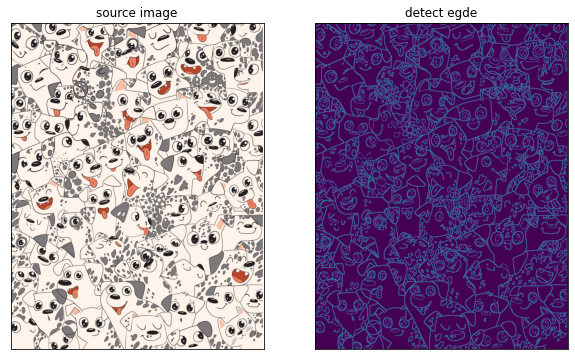

In [4]:
#read image
image= cv2.imread('cho.jpg')

#convert color image to grayscale
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img = image.copy()

#detect egde.
i = cv2.Canny(img, 50, 200)

#show
plt.figure(figsize=(10,6))
plt.subplot(121),plt.imshow(image[:,:,::-1])
plt.title('source image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(i)
plt.title('detect egde'), plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
#read objects image
obj= cv2.imread('objects.jpg')

In [6]:
#read template with grayscale and dectect egde of template.
def read_template(template_name):
    template = cv2.imread(template_name, 0)
    t = cv2.Canny(template, 50, 200)
    return t

In [7]:
def match_template(t, i, img_copy, method):
    found = None
    w, h = t.shape[::-1]
    for scale in np.linspace(0.2, 1.0, 20)[::-1]:
        
        #resize image according to the scale
        resized = imutils.resize(t, width = int(t.shape[1]*scale))
        
        # ratio of the resizing
        r = t.shape[1] / float(resized.shape[1])

        # Apply template Matching
        res = cv2.matchTemplate(i,resized,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        
        if found is None or max_val > found[0]:
            found = (max_val, max_loc, r)

    ## draw a bounding box around the detected region
    (max_val, max_loc, r) = found
    (startX, startY) = (int(max_loc[0]), int(max_loc[1]))
    (endX, endY) = (int((max_loc[0] + w/r)), int((max_loc[1] + h/r)))
    cv2.rectangle(img, (startX, startY), (endX, endY), (255, 255, 0), 5)

In [8]:
#read template from templates list, find object in source image.
templates=['1.jpg','2.jpg','3.jpg','4.jpg','5.jpg','6.jpg','7.jpg','8.jpg','9.jpg','10.jpg','11.jpg','12.jpg']
for temp in templates:
    name=''.join(str(temp))
    t= read_template(name)
    match_template(t,i,img,cv2.TM_CCOEFF_NORMED)

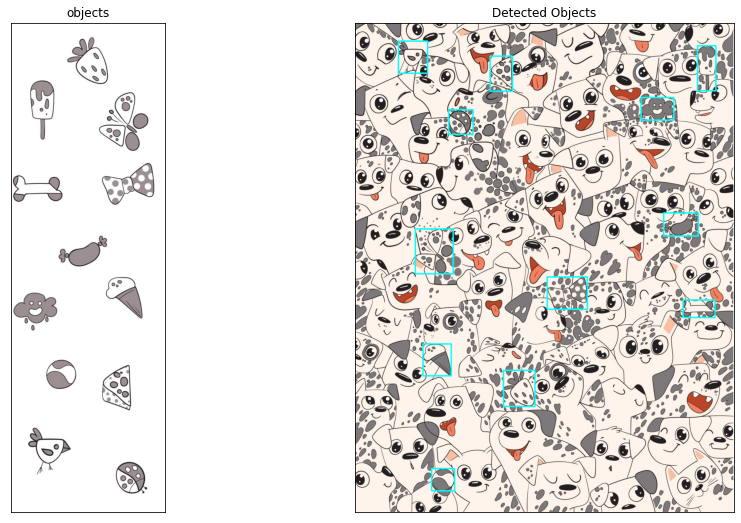

In [9]:
#show result
plt.figure(figsize=(15,9))
plt.subplot(121),plt.imshow(obj[:,:,::-1])
plt.title('objects'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img[:,:,::-1])
plt.title('Detected Objects'), plt.xticks([]), plt.yticks([])
plt.show()





# Counting Objects


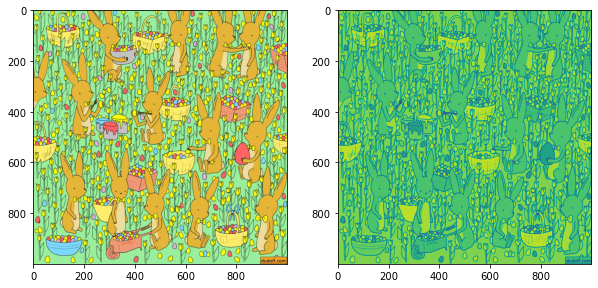

In [10]:
#read image
img_count = cv2.imread('rabbit.jpg')

#convert image into grayscale image
img_count_gray = cv2.cvtColor(img_count, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img_count[:,:,::-1])
plt.subplot(122)
plt.imshow(img_count_gray)
plt.show()

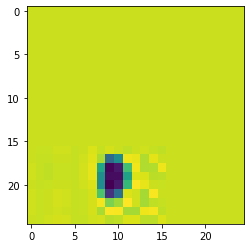

In [11]:
#read the template, convert template to gray
template_count = cv2.imread('eye.jpg', 0)
plt.imshow(template_count)

In [12]:
#kiểm tra sự giao nhau của các kết quả.
def intersected(bottom_left1, top_right1, bottom_left2, top_right2):
    if top_right1[0] < bottom_left2[0] or bottom_left1[0] > top_right2[0]:
        return 0
    if top_right1[1] < bottom_left2[1] or bottom_left1[1] > top_right2[1]:
        return 0
    return 1

Số con thỏ có trong hình là:  14


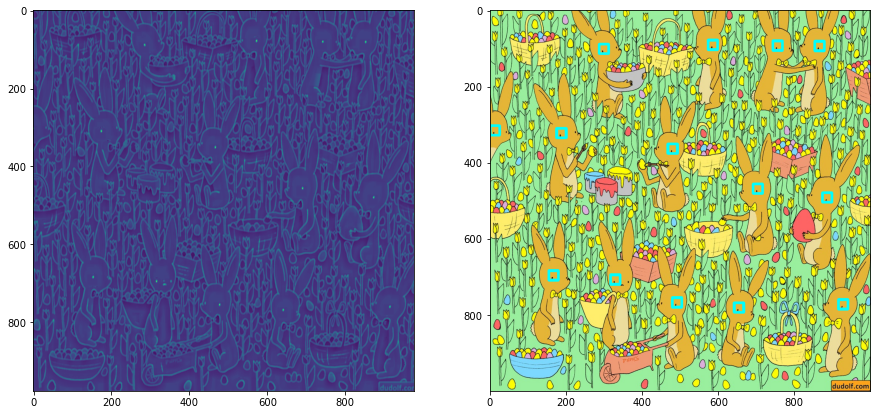

In [13]:
image_copy = img_count.copy()
wt, ht = template_count.shape[::-1]

# Apply template Matching
res = cv2.matchTemplate(img_count_gray,template_count, cv2.TM_CCOEFF_NORMED)

#threshold
threshold = 0.85
loc = np.where(res >= threshold)

#để có thể đếm được có bao nhiêu con thỏ thì cần: 
#Loại bỏ các điểm gần vị trí (x, y) là lần phát hiện đầu tiên của một đối tượng
#Chỉ giữ lại một điểm của một lần phát hiện đối tượng
#Tức là một đối tượng sẽ chỉ được đánh dấu một lần duy nhất
#làm như vậy với tất cả các vị trí trong loc.

#tạo một list chứa tất cả các kết quả phù hợp
#kiểm tra xem có điểm giao nhau giữa các kết quả trong danh sách hay không:
objects = []
for pt in zip( * loc[::-1]):
    is_one_object = 0
    for obj in objects:
        if intersected(obj, (obj[0] + wt, obj[1] + ht), pt, (pt[0] + wt, pt[1] + ht)):
            is_one_object = 1
            break
    if is_one_object == 0:
        objects.append(pt)
    rect = cv2.rectangle(image_copy, pt, (pt[0] + wt, pt[1] + ht), (255, 255, 0), 5)

#show result.
print("Số con thỏ có trong hình là: ",len(objects))
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(res)
plt.subplot(122)
plt.imshow(image_copy[:,:,::-1])
plt.show()
